## Setup environment

In [3]:
%env CUDA_VISIBLE_DEVICES=0

env: CUDA_VISIBLE_DEVICES=0


## Setup imports

In [2]:
import os
import json

from monai.apps.auto3dseg import AutoRunner, DataAnalyzer
from monai.config import print_config

print_config()

MONAI version: 1.3.0
Numpy version: 1.26.0
Pytorch version: 2.1.1
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: 865972f7a791bf7b42efbcd87c8402bd865b329e
MONAI __file__: c:\Users\<username>\miniforge3\envs\p310-torch\lib\site-packages\monai\__init__.py

Optional dependencies:
Pytorch Ignite version: NOT INSTALLED or UNKNOWN VERSION.
ITK version: NOT INSTALLED or UNKNOWN VERSION.
Nibabel version: 5.1.0
scikit-image version: 0.22.0
scipy version: 1.11.3
Pillow version: 10.0.1
Tensorboard version: 2.15.1
gdown version: NOT INSTALLED or UNKNOWN VERSION.
TorchVision version: 0.16.1
tqdm version: 4.66.1
lmdb version: NOT INSTALLED or UNKNOWN VERSION.
psutil version: 5.9.5
pandas version: 2.1.3
einops version: 0.7.0
transformers version: NOT INSTALLED or UNKNOWN VERSION.
mlflow version: NOT INSTALLED or UNKNOWN VERSION.
pynrrd version: NOT INSTALLED or UNKNOWN VERSION.
clearml version: NOT INSTALLED or UNKNOWN VERSION.

For details about installing the

# setup working dir and dataset

In [5]:
work_dir = "D:\\Files\\Projects\\MAIA\\UdG\\MISA\\Project\\auto3dseg"
dataroot_dir = os.path.join(work_dir, "dataset")
datalist_file = os.path.join(work_dir, "misa_datalist.json")
datalist = json.load(open(datalist_file, "r"))

In [6]:
analyser = DataAnalyzer(datalist_file, dataroot_dir)
datastat = analyser.get_all_case_stats()

2023-12-08 14:09:21,936 - INFO - Found 1 GPUs for data analyzing!


100%|██████████| 10/10 [00:07<00:00,  1.42it/s]

2023-12-08 14:09:29,049 - INFO - Data spacing is not completely uniform. MONAI transforms may provide unexpected result
2023-12-08 14:09:29,049 - INFO - Writing data stats to ./datastats.yaml.
2023-12-08 14:09:29,064 - INFO - Writing by-case data stats to ./datastats_by_case.yaml, this may take a while.


## Auto3DSeg AutoRunner pipeline

`AutoRunner` provides an interface to run the Auot3DSeg pipeline. It will automatically configure four different neural networks and perform multi-fold training to achieve state-of-the-art performance.

Now we set up the `AutoRunner` with some settings:

In [9]:
runner = AutoRunner(
    work_dir=work_dir,
    input={
        "modality": "MRI",
        "datalist": datalist_file,
        "dataroot": dataroot_dir,
    },
)

2023-12-08 14:09:44,298 - INFO - AutoRunner using work directory D:\Files\Projects\MAIA\UdG\MISA\Project\auto3dseg
2023-12-08 14:09:44,299 - INFO - No fold numbers provided, attempting to use a single fold based on the validation key
2023-12-08 14:09:44,316 - INFO - Using user defined command running prefix , will override other settings


--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\legor\miniforge3\envs\p310-torch\lib\logging\__init__.py", line 1100, in emit
    msg = self.format(record)
  File "c:\Users\legor\miniforge3\envs\p310-torch\lib\logging\__init__.py", line 943, in format
    return fmt.format(record)
  File "c:\Users\legor\miniforge3\envs\p310-torch\lib\logging\__init__.py", line 678, in format
    record.message = record.getMessage()
  File "c:\Users\legor\miniforge3\envs\p310-torch\lib\logging\__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "c:\Users\legor\miniforge3\envs\p310-torch\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\legor\miniforge3\envs\p310-torch\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:\Users\legor\miniforge3\envs\p310-torch\lib\site-packages\ipykernel_launcher.py", l

## Override the training parameters

We need to set fold to 1, so we only train on the training files and validate on the validation set.

In [10]:
runner.set_num_fold(num_fold=1)

## Start the data analysis, algorithm generation, training, and model ensemble

In [11]:
runner.run()

2023-12-08 14:10:12,512 - INFO - Running data analysis...
2023-12-08 14:10:12,514 - INFO - Found 1 GPUs for data analyzing!


100%|██████████| 15/15 [00:07<00:00,  1.95it/s]

2023-12-08 14:10:20,282 - INFO - Data spacing is not completely uniform. MONAI transforms may provide unexpected result
2023-12-08 14:10:20,282 - INFO - Writing data stats to D:\Files\Projects\MAIA\UdG\MISA\Project\auto3dseg\datastats.yaml.
2023-12-08 14:10:20,296 - INFO - Writing by-case data stats to D:\Files\Projects\MAIA\UdG\MISA\Project\auto3dseg\datastats_by_case.yaml, this may take a while.
2023-12-08 14:10:20,401 - INFO - BundleGen from https://github.com/Project-MONAI/research-contributions/releases/download/algo_templates/249bf4b.tar.gz



algo_templates.tar.gz: 104kB [00:00, 124kB/s]                              

2023-12-08 14:10:21,266 - INFO - Downloaded: C:\Users\legor\AppData\Local\Temp\tmp4_46g753\algo_templates.tar.gz
2023-12-08 14:10:21,266 - INFO - Expected md5 is None, skip md5 check for file C:\Users\legor\AppData\Local\Temp\tmp4_46g753\algo_templates.tar.gz.
2023-12-08 14:10:21,267 - INFO - Writing into directory: D:\Files\Projects\MAIA\UdG\MISA\Project\auto3dseg.


2023-12-08 14:10:21,588 - INFO - Generated:D:\Files\Projects\MAIA\UdG\MISA\Project\auto3dseg\dints_0
2023-12-08 14:10:21,652 - INFO - Generated:D:\Files\Projects\MAIA\UdG\MISA\Project\auto3dseg\segresnet_0
2023-12-08 14:10:21,689 - INFO - segresnet2d_0 is skipped! SegresNet2D is skipped due to median spacing of [0.9375, 1.5, 0.9375],  which means the dataset is not highly anisotropic, e.g. spacing[2] < 3*(spacing[0] + spacing[1])/2) .
2023-12-08 14:10:21,784 - INFO - Generated:D:\Files\Projects\MAIA\UdG\MISA\Project\auto3dseg\swinunetr_0
2023-12-08 14:10:21,850 - INFO - ['python', 'D:\\Files\\Projects\\MAIA\\UdG\\MISA\\Project\\auto3dseg\\dints_0\\scripts\\train.py', 'run', "--config_file='D:/Files/Projects/MAIA/UdG/MISA/Project/auto3dseg/dints_0/configs/hyper_parameters.yaml,D:/Files/Projects/MAIA/UdG/MISA/Project/auto3dseg/dints_0/configs/hyper_parameters_search.yaml,D:/Files/Projects/MAIA/UdG/MISA/Project/auto3dseg/dints_0/configs/network.yaml,D:/Files/Projects/MAIA/UdG/MISA/Project

Ensembling (rank 0)...:   0%|          | 0/3 [00:00<?, ?it/s]D:\Files\Projects\MAIA\UdG\MISA\Project\auto3dseg\segresnet_0\scripts\segmenter.py:496: UserWarning: Multiprocessing method fork is not available, some non-picklable objects (e.g. lambda ) may fail
  warnings.warn(
Ensembling (rank 0)...: 100%|██████████| 3/3 [00:12<00:00,  4.11s/it]
Auto3Dseg pipeline is completed successfully.


## Perform inference on validation data for report

In [1]:
import os

from monai.apps.auto3dseg import (
    AlgoEnsembleBuilder,
    AlgoEnsembleBestN,
    import_bundle_algo_history
)

from monai.bundle.config_parser import ConfigParser
from monai.utils.enums import AlgoKeys


In [2]:
work_dir = "D:\\Files\\Projects\\MAIA\\UdG\\MISA\\Project\\auto3dseg"
datalist_file = os.path.join(work_dir, "misa_datalist_val.json")
dataroot_dir = os.path.join(work_dir, "dataset")

input = {
    "modality": "MRI",
    "datalist": datalist_file,
    "dataroot": dataroot_dir,
}

input_cfg = "input_val.yaml"
ConfigParser.export_config_file(input, input_cfg)

In [3]:
history = import_bundle_algo_history(work_dir, only_trained=True)

## model ensemble
n_best = 1
builder = AlgoEnsembleBuilder(history, input_cfg)
builder.set_ensemble_method(AlgoEnsembleBestN(n_best=n_best))
ensemble = builder.get_ensemble()
pred = ensemble()
print("ensemble picked the following best {0:d}:".format(n_best))
for algo in ensemble.get_algo_ensemble():
    print(algo[AlgoKeys.ID])

D:\Files\Projects\MAIA\UdG\MISA\Project\auto3dseg\segresnet_0\scripts\segmenter.py:496: UserWarning: Multiprocessing method fork is not available, some non-picklable objects (e.g. lambda ) may fail
  warnings.warn(
c:\Users\legor\miniforge3\envs\p310-torch\lib\site-packages\monai\apps\auto3dseg\ensemble_builder.py:229: UserWarning: Prediction returned in list instead of disk, provide image_save_func to avoid out of memory.
  warn("Prediction returned in list instead of disk, provide image_save_func to avoid out of memory.")


ensemble picked the following best 1:
segresnet_0


In [10]:
from monai.transforms import (
    Compose,
    LoadImaged,
    EnsureChannelFirstd,
    NormalizeIntensityd,
)
from monai.data import (
    DataLoader,
    Dataset,
)

import datasets as d
import torch
import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk

In [5]:
data_dir = "d:\\Files\\GDrive\\Documents\\MaIA\\Courses\\UdG\\MISA\\Project\\dataset"

val_transforms = Compose(
    [
        LoadImaged(keys=["image", "label"]),
        EnsureChannelFirstd(keys=["image", "label"], channel_dim=-1),
        NormalizeIntensityd(keys=["image"]),
    ]
)

json_file_path = os.path.join(data_dir, "misa_datalist.json")
if not os.path.exists(json_file_path):
    d.generate_misa_json_datalist(data_dir, "misa_datalist.json")
datalist = d.load_misa_datalist(json_file_path, "training")
val_files = d.load_misa_datalist(json_file_path, "validation")

val_ds = Dataset(
    data=val_files,
    transform=val_transforms,
)
val_loader = DataLoader(
    val_ds,
    batch_size=1,
    shuffle=False,
    num_workers=8,
    pin_memory=True,
)

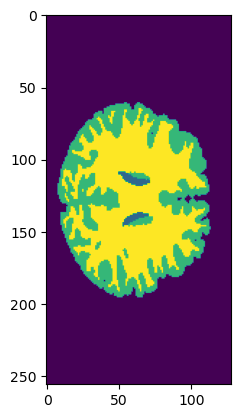

In [6]:
plt.figure()
plt.imshow(pred[0][0, :, :, 150])
plt.show()

In [8]:
def calculate_dice_score(labels_seg, labels_gt, print_score=True):
    dice_score = {}
    
    # please check what are the actual label values for the dataset you are working with

    label_seg_csf = labels_seg == 1
    label_seg_gm = labels_seg == 2
    label_seg_wm = labels_seg == 3

    label_gt_csf = labels_gt == 1
    label_gt_gm = labels_gt == 2
    label_gt_wm = labels_gt == 3

    dice_score['csf'] = np.sum(label_gt_csf[label_seg_csf]) * 2.0 / (np.sum(label_gt_csf) + np.sum(label_seg_csf))
    dice_score['gm'] = np.sum(label_gt_gm[label_seg_gm]) * 2.0 / (np.sum(label_gt_gm) + np.sum(label_seg_gm))
    dice_score['wm'] = np.sum(label_gt_wm[label_seg_wm]) * 2.0 / (np.sum(label_gt_wm) + np.sum(label_seg_wm))

    if print_score:
        print('Dice scores:')
        for key, value in dice_score.items():
            print(f'{key}: {value:.4f}')
            
        print(f'Average: {np.mean(list(dice_score.values())):.4f}')

    return dice_score

In [11]:
def calculate_hausdorff_distance(labels_pred, labels_gt, print_score=True):
    """
    Calculate the Hausdorff distance for each label in the predicted and ground truth segmentation.

    Parameters
    ----------
    labels_pred : numpy array
        Predicted segmentation labels.
    labels_gt : numpy array
        Ground truth segmentation labels.
    print_score : bool, optional
        Whether to print the Hausdorff distance for each label, by default True.

    Returns
    -------
    hd_score : dict
        Dictionary containing the Hausdorff distance for each label.
    """
    # Convert numpy arrays to SimpleITK images
    pred_image = sitk.GetImageFromArray(labels_pred)
    gt_image = sitk.GetImageFromArray(labels_gt)

    # Create the Hausdorff distance filter
    hd_filter = sitk.HausdorffDistanceImageFilter()

    # Calculate the Hausdorff distance for each label
    hd_scores = {}
    for label, label_name in zip([1, 2, 3], ['csf', 'gm', 'wm']):
        pred_label = sitk.BinaryThreshold(pred_image, label, label)
        gt_label = sitk.BinaryThreshold(gt_image, label, label)

        hd_filter.Execute(pred_label, gt_label)
        hd_scores[label_name] = hd_filter.GetHausdorffDistance()
    
    if print_score:
        print('Hausdorff distance:')
        for key, value in hd_scores.items():
            print(f'{key}: {value:.4f}')
        
        print(f'Average: {np.mean(list(hd_scores.values())):.4f}')

    return hd_scores

In [12]:
def calculate_avd(pred_labels, gt_labels, print_scores=True):
    """
    Calculate the average volumetric difference (AVD) per label between predicted and ground truth labels.

    Parameters
    ----------
    pred_labels : numpy.ndarray
        Predicted segmentation labels.
    gt_labels : numpy.ndarray
        Ground truth segmentation labels.
    print_scores : bool, optional
        Whether to print the AVD scores per label, by default True.

    Returns
    -------
    avd_scores : dict
        Dictionary containing the average volumetric difference (AVD) score per label.
    """
    avd_scores = {}
    
    for label, label_name in zip([1, 2, 3], ['csf', 'gm', 'wm']):
        pred_label = pred_labels == label
        gt_label = gt_labels == label

        avd_scores[label_name] = np.abs(np.sum(pred_label) - np.sum(gt_label)) / np.sum(gt_label)

    if print_scores:
        print("Average Volumetric Difference (AVD) per label:")
        for label, score in avd_scores.items():
            print(f"Label {label}: {score:.4f}")
            
        print(f"Average: {np.mean(list(avd_scores.values())):.4f}")

    return avd_scores


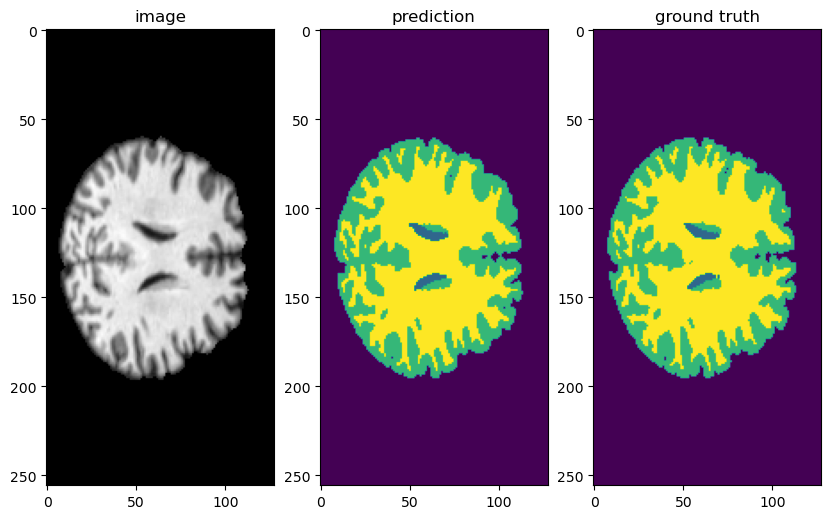

Dice scores:
csf: 0.8990
gm: 0.9485
wm: 0.9582
Average: 0.9352

Hausdorff distance:
csf: 8.7750
gm: 7.0711
wm: 6.4807
Average: 7.4423

Average Volumetric Difference (AVD) per label:
Label csf: 0.0279
Label gm: 0.0164
Label wm: 0.0143
Average: 0.0195



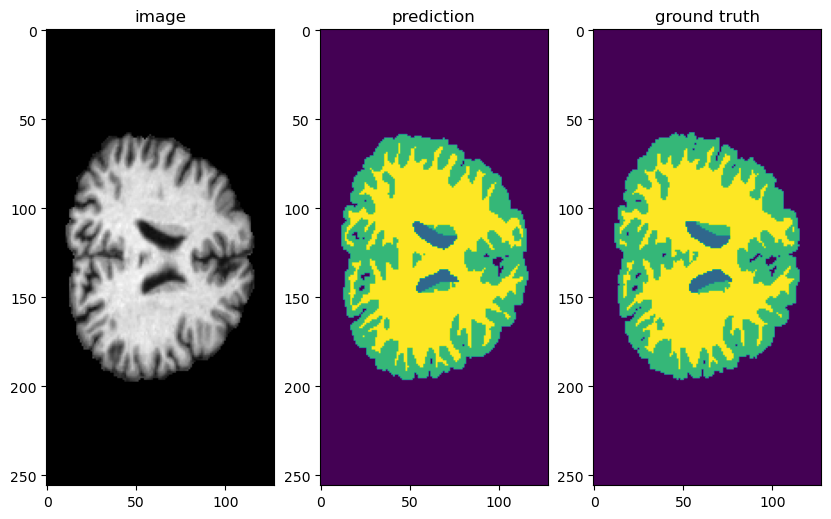

Dice scores:
csf: 0.9060
gm: 0.9332
wm: 0.9333
Average: 0.9242

Hausdorff distance:
csf: 9.4868
gm: 7.0000
wm: 10.0499
Average: 8.8456

Average Volumetric Difference (AVD) per label:
Label csf: 0.1291
Label gm: 0.0234
Label wm: 0.0941
Average: 0.0822



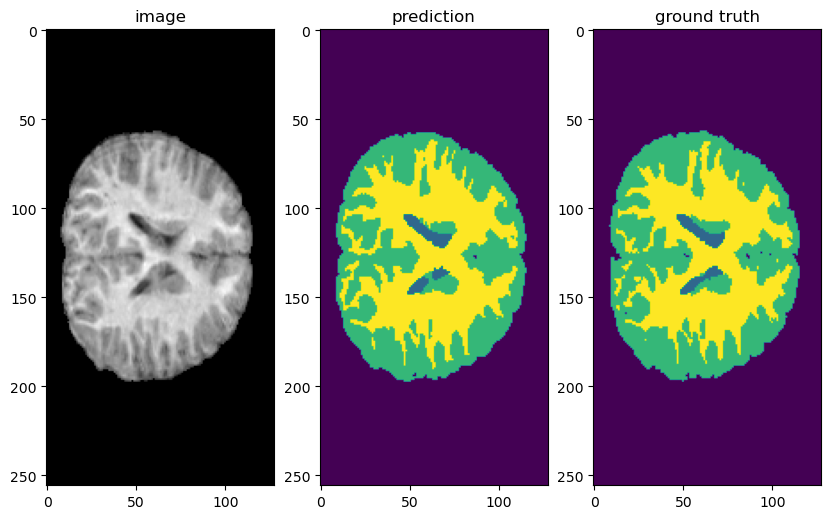

Dice scores:
csf: 0.8989
gm: 0.9428
wm: 0.9166
Average: 0.9194

Hausdorff distance:
csf: 11.2250
gm: 8.0000
wm: 12.9615
Average: 10.7288

Average Volumetric Difference (AVD) per label:
Label csf: 0.0149
Label gm: 0.0555
Label wm: 0.1128
Average: 0.0611



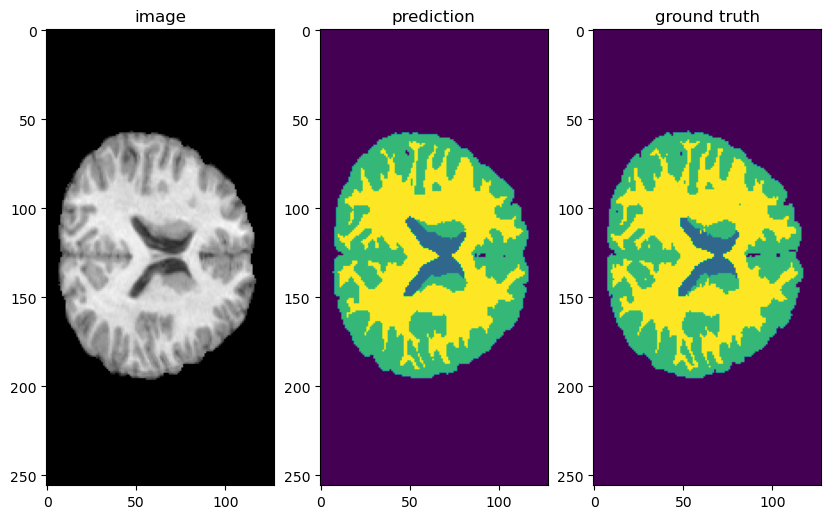

Dice scores:
csf: 0.9225
gm: 0.9567
wm: 0.9513
Average: 0.9435

Hausdorff distance:
csf: 6.3246
gm: 7.5498
wm: 6.4031
Average: 6.7592

Average Volumetric Difference (AVD) per label:
Label csf: 0.1002
Label gm: 0.0172
Label wm: 0.0137
Average: 0.0437



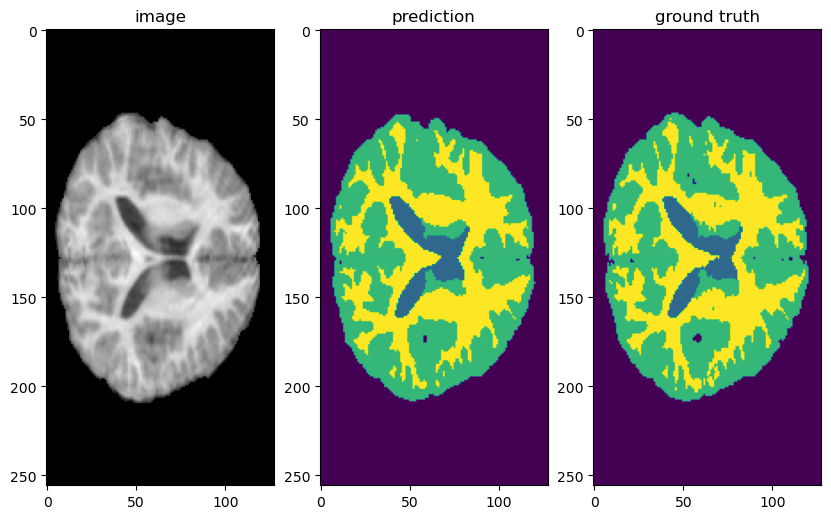

Dice scores:
csf: 0.9381
gm: 0.9527
wm: 0.9399
Average: 0.9436

Hausdorff distance:
csf: 11.1803
gm: 6.1644
wm: 8.6603
Average: 8.6683

Average Volumetric Difference (AVD) per label:
Label csf: 0.0256
Label gm: 0.0078
Label wm: 0.0139
Average: 0.0157


Mean dice scores:
csf: 0.9129248808526512
gm: 0.946779138402362
wm: 0.939868828956655

##################################################
AVERAGE SCORES FOR ALL CASES
##################################################

Average dice scores for all cases:
csf: 0.9129
gm: 0.9468
wm: 0.9399
Total average: 0.9332

Average Hausdorff scores for all cases:
csf: 9.3983
gm: 7.1571
wm: 8.9111
Total average: 8.4888

Average AVD scores for all cases:
csf: 0.0595
gm: 0.0241
wm: 0.0498
Total average: 0.0445


In [19]:
slice_n = 150

dice_scores = []
hd_scores = []
avd_scores = []

y_pred = []
y_true = []

for case_num in range(5):
    img = val_ds[case_num]["image"]
    label = val_ds[case_num]["label"]
    val_inputs = torch.squeeze(img).detach().cpu().numpy()
    val_labels = torch.squeeze(label).detach().cpu().numpy()
    preds = torch.squeeze(pred[case_num]).detach().cpu().numpy()
    
    y_pred.append(preds)
    y_true.append(val_labels)
    
    plt.figure("check", (10, 6))
    plt.subplot(1, 3, 1)
    plt.title("image")
    plt.imshow(val_inputs[:, :, slice_n], cmap="gray")
    plt.subplot(1, 3, 2)
    plt.title("prediction")
    plt.imshow(preds[:, :, slice_n])
    plt.subplot(1, 3, 3)
    plt.title("ground truth")
    plt.imshow(val_labels[:, :, slice_n])
    plt.show()
    
    dice_score = calculate_dice_score(preds, val_labels, print_score=True)
    dice_scores.append(dice_score)
    print()
    
    hd_score = calculate_hausdorff_distance(preds, val_labels, print_score=True)
    hd_scores.append(hd_score)
    print()
    
    avd_score = calculate_avd(preds, val_labels, print_scores=True)
    avd_scores.append(avd_score)
    print()
    

        
# print mean dice scores for 'csf' 'wm' 'gm'
mean_dice_score = {}
for key in dice_scores[0].keys():
    mean_dice_score[key] = np.mean([dice_score[key] for dice_score in dice_scores])
print('\nMean dice scores:')
for key, value in mean_dice_score.items():
    print(f'{key}: {value}')

print()
print("#" * 50)
print("AVERAGE SCORES FOR ALL CASES")
print("#" * 50)

# calculate the average for csf, gm, and wm for dice scores
print("\nAverage dice scores for all cases:")
average_dice_score = {}
for key in dice_scores[0].keys():
    average_dice_score[key] = np.mean([dice_score[key] for dice_score in dice_scores])
for key, value in average_dice_score.items():
    print(f"{key}: {value:.4f}")
print(f"Total average: {np.mean(list(average_dice_score.values())):.4f}")

# calculate the average for csf, gm, and wm for Hausdorff scores
print("\nAverage Hausdorff scores for all cases:")
average_hd_score = {}
for key in hd_scores[0].keys():
    average_hd_score[key] = np.mean([hd_score[key] for hd_score in hd_scores])
for key, value in average_hd_score.items():
    print(f"{key}: {value:.4f}")
print(f"Total average: {np.mean(list(average_hd_score.values())):.4f}")

# calculate the average for csf, gm, and wm for AVD scores
print("\nAverage AVD scores for all cases:")
average_avd_score = {}
for key in avd_scores[0].keys():
    average_avd_score[key] = np.mean([avd_score[key] for avd_score in avd_scores])
for key, value in average_avd_score.items():
    print(f"{key}: {value:.4f}")
print(f"Total average: {np.mean(list(average_avd_score.values())):.4f}")

In [15]:
import pandas as pd

val_cases_orig = [11, 12, 13, 14, 17]

df_dice_orig = pd.DataFrame(dice_scores)
df_dice = df_dice_orig.copy()
df_dice['average'] = df_dice_orig.mean(axis=1)
df_dice['std'] = df_dice_orig.std(axis=1)

df_hausdorff_orig = pd.DataFrame(hd_scores)
df_hausdorff = df_hausdorff_orig.copy()
df_hausdorff['average'] = df_hausdorff_orig.mean(axis=1)
df_hausdorff['std'] = df_hausdorff_orig.std(axis=1)

df_avd_orig = pd.DataFrame(avd_scores)
df_avd = df_avd_orig.copy()
df_avd['average'] = df_avd_orig.mean(axis=1)
df_avd['std'] = df_avd_orig.std(axis=1)

df_scores = pd.concat([df_dice, df_hausdorff, df_avd], axis=1)
df_scores.index = val_cases_orig

# rename the columns
df_scores.columns = [
    'dice_csf', 'dice_gm', 'dice_wm', 'dice_average', 'dice_std',
    'hd', 'hd_gm', 'hd_wm', 'hd_average', 'hd_std',
    'avd_csf', 'avd_gm', 'avd_wm', 'avd_average', 'avd_std'
]

# export to excel
df_scores.to_excel('results/exp03_scores.xlsx')

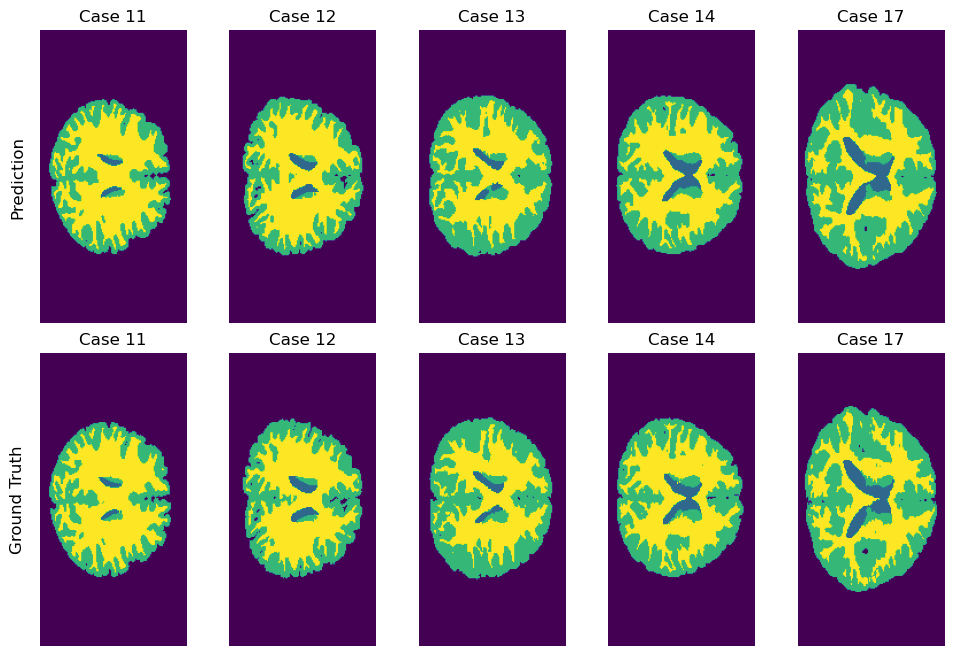

In [20]:
import matplotlib.pyplot as plt

n_slice = 150

# Create subplots with 3 rows and the number of columns based on the number of images
fig, axes = plt.subplots(2, len(y_true), figsize=(12, 8))

# Add vertical text to indicate original, prediction, and ground truth
axes[0, 0].text(-20, 128, "Prediction", rotation="vertical", va="center", ha="center", fontsize=12)
axes[1, 0].text(-20, 128, "Ground Truth", rotation="vertical", va="center", ha="center", fontsize=12)

# Plot predictions
for i in range(len(y_pred)):
    axes[0, i].imshow(y_pred[i][:, :, n_slice])
    axes[0, i].set_title(f"Case {val_cases_orig[i]}")
    axes[0, i].axis("off")

# Plot ground truth
for i in range(len(y_true)):
    axes[1, i].imshow(y_true[i][:, :, n_slice])
    axes[1, i].set_title(f"Case {val_cases_orig[i]}")
    axes[1, i].axis("off")

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Show the plot
plt.show()